In [13]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

input  image size = (340, 384)
output image size = (340, 384)


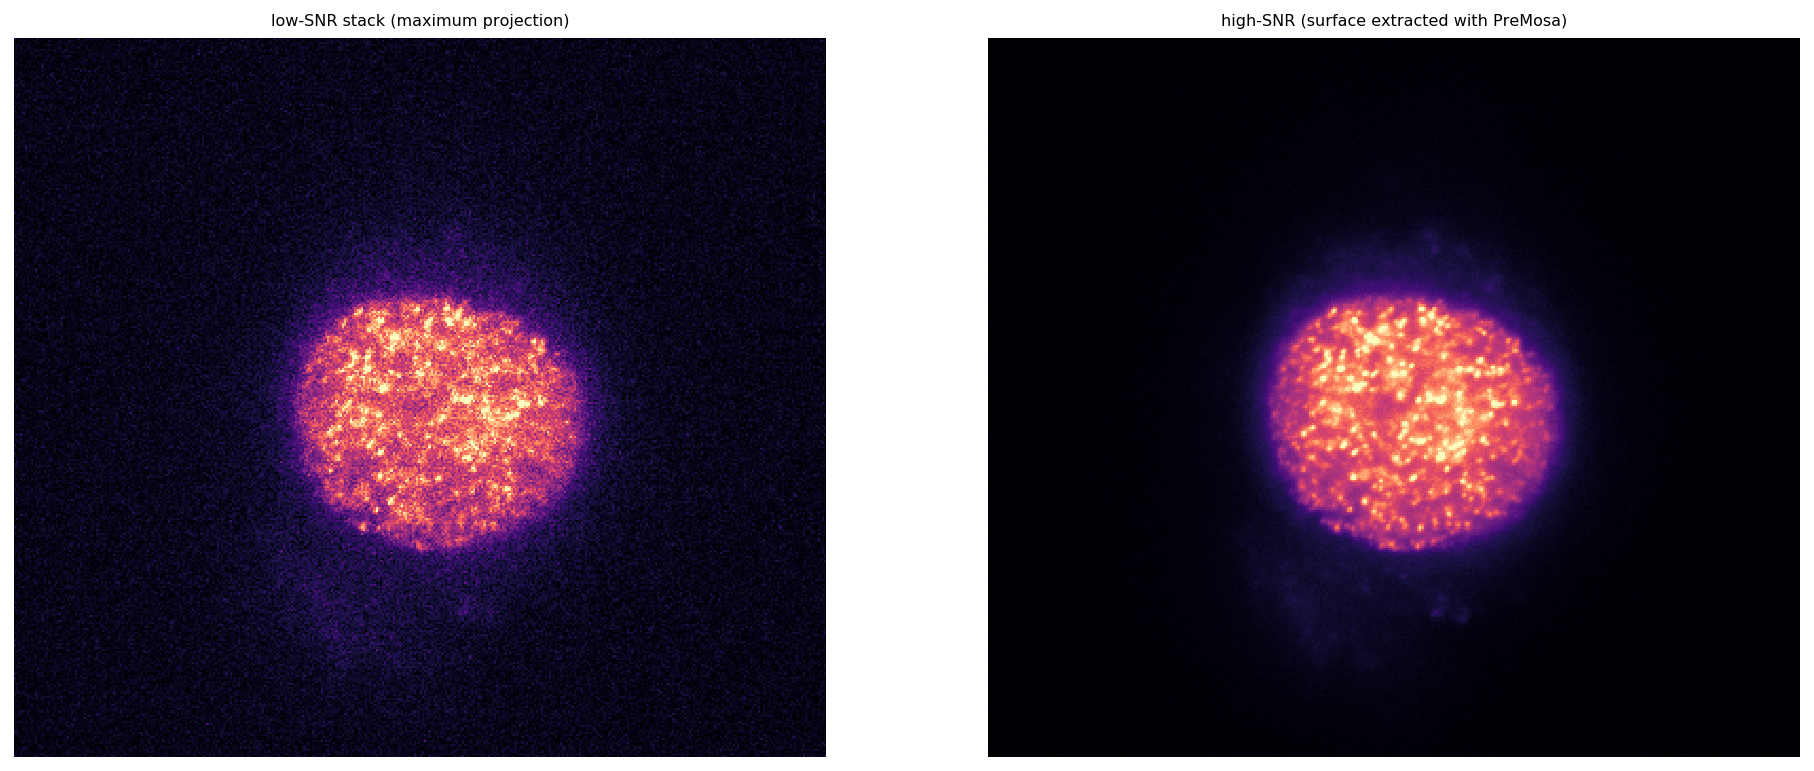

In [14]:
y = imread('data/nucleo/gt/001.tif')
x = imread('data/nucleo/in/001.tif')
ncMovie = imread('data/nucleo/movie/stack01.tif')
print('input  image size =', x.shape)
print('output image size =', y.shape)

axes        = 'YX'
    
plt.figure(figsize=(16,10))
plot_some(np.stack([x,np.broadcast_to(y,x.shape)]),
          title_list=[['low-SNR stack (maximum projection)','high-SNR (surface extracted with PreMosa)']], 
          pmin=2,pmax=99.8);

In [15]:
model = CARE(config=None, name='my_model_Paul', basedir='models')

Loading network weights from 'weights_best.h5'.


In [16]:
%%time
# restored = model.predict(x, axes)
restored = model.predict(ncMovie, axes)
# restored = model.predict(ncMovie, axes='ZYX', factor=4)


CPU times: user 3.26 s, sys: 133 ms, total: 3.39 s
Wall time: 699 ms


In [17]:
%%time
# restored = model.predict(x, axes, n_tiles=(1,4,4))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs


In [18]:
Path('results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('results/%s_nGFP_0.1_0.2_0.5_20_14_late.tif' % model.name, restored, axes)

In [20]:
# plt.figure(figsize=(16,10))
# plot_some(np.stack([x,restored,y]),
#           title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
#           pmin=2,pmax=99.8);